### Customer Segmentation

customer segmentation is a process of dividing customers into different groups based on their characteristics. This can be useful for mall management in order to better understand their customers and tailor marketing strategies to different groups. One popular method for customer segmentation is k-means clustering, which is a machine learning technique that groups similar data points together. In this article, we will be discussing how to use the k-means algorithm in Python to perform customer segmentation for a mall.

### The k-means Algorithm

The k-means algorithm is a simple yet powerful method for grouping similar data points together. It works by dividing a dataset into k clusters, where each cluster is represented by its centroid (mean). The algorithm iteratively assigns each data point to the cluster with the nearest centroid, and then updates the centroid based on the new data point assignments.

The first step is to import the necessary libraries, including scikit-learn, numpy,  pandas, seaborn and matplotlib.

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

The link for the dataset that I will be using in this article : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


In [24]:
# Load dataset
data = pd.read_csv("Mall_Customers.csv")

### Data Exploration

#### Data Cleaning:

The first step in preprocessing is data cleaning, which involves removing or correcting any errors or inconsistencies in the dataset. 

Check if there is missing or duplicate data

In [25]:
# Data preprocessing
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [26]:
data.rename(columns = {'Age':'age', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'spending'}, inplace=True)

In [27]:
# drop null values if any
data.duplicated().sum()

0

Dealing with outliers

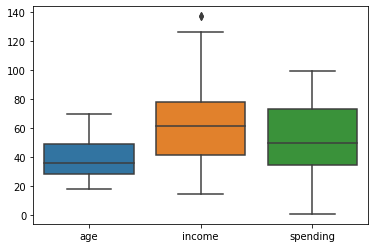

In [28]:
# check for outliers using box plot
sns.boxplot(data=data[['age', 'income', 'spending']])
plt.show()


We notice outliers present in income. Outliers are values that are significantly different from the rest of the data in a dataset. These values can have a negative impact on the performance of a machine learning model, as they can skew the results. One of the most common ways to identify and remove outliers is through the use of the z-score.

The z-score is a statistical measure that is used to indicate how many standard deviations a data point is from the mean. It is calculated by subtracting the mean from the data point and dividing by the standard deviation. A z-score of 0 indicates that the data point is exactly the same as the mean, while a z-score of 1 indicates that the data point is one standard deviation above the mean.

The z-score is most commonly used to remove outliers when the data is approximately normally distributed. This is because the z-score is based on the normal distribution, which is a bell-shaped distribution that is often assumed for many types of data. When the data is normally distributed, outliers can be easily identified by their z-scores, as they will have a z-score that is significantly larger than the rest of the data.

It's worth mentioning that the z-score method will not work well with data that is not normally distributed. In that case, other methods such as the Interquartile range (IQR) method can be used.

we can set a threshold, usually 3 or -3, to identify and remove outliers. Any data point with a z-score above or below this threshold can be considered an outlier and can be removed from the dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


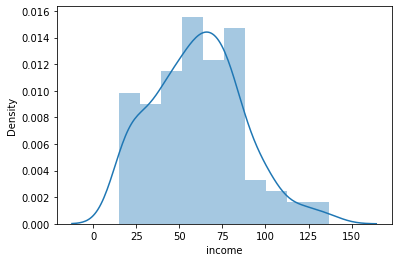

In [29]:
sns.distplot(data['income']);


In [30]:
# remove outliers using z-score
from scipy import stats
data = data[(np.abs(stats.zscore(data[[ 'income']])) < 3).all(axis=1)]

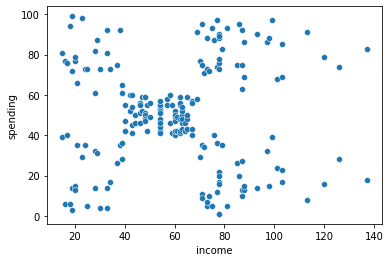

In [31]:
sns.scatterplot(data=data, x='income',y='spending' )


In [32]:
data.drop('CustomerID', axis=1, inplace=True)

In [33]:
data['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

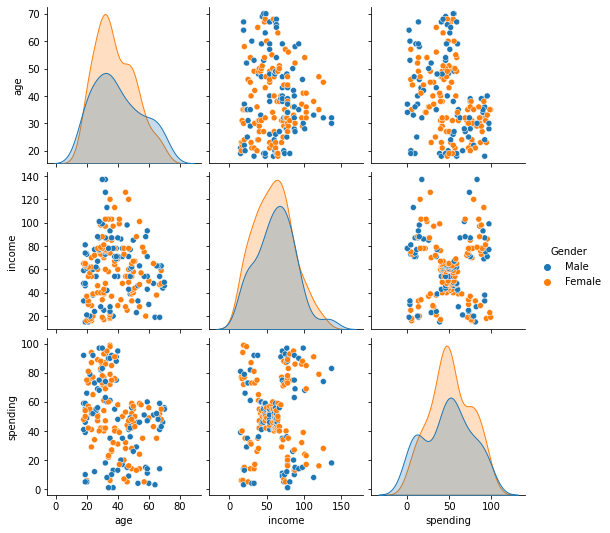

In [34]:
sns.pairplot(data,hue='Gender')


We can observe the distribution of male and female across all features to be similar. So, Gender feature won't contribute much to the performance of clustering algorithm. Thus, we won't be using Gender column during clustering.

In [35]:
# Select features for clustering
X = data[['age', 'income', 'spending']]

Next, we will perform standardization to ensure that all the features have the same scale. Z-score normalization, also known as standardization, is a technique that is used to standardize the data by subtracting the mean and dividing by the standard deviation. This technique is useful when the data is normally distributed, and it helps to ensure that the data has a mean of 0 and a standard deviation of 1.

In [36]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Choosing optimal number of clusters

Choosing the optimal number of clusters in k-means clustering is an important step that can greatly impact the performance of the model. The optimal number of clusters is the one that best balances the trade-off between the complexity of the model and the accuracy of the clustering.

The elbow method is a technique used to determine the optimal number of clusters in a k-means clustering algorithm. The idea behind the elbow method is to run the k-means clustering algorithm for different values of k and then plot the within-cluster sum of squares (WCSS) against the number of clusters. The optimal number of clusters is chosen as the value of k where the change in WCSS begins to level off, creating an "elbow" shape in the plot.



Text(0, 0.5, 'WCSS')

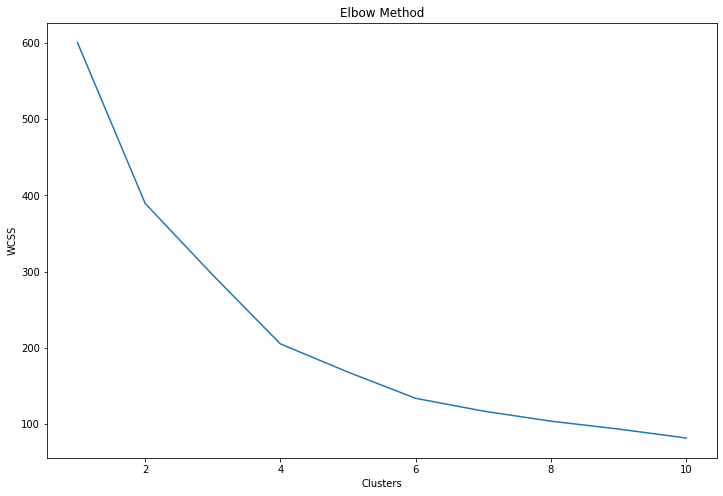

In [37]:
# Choosing the optimal number of clusters

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=wcss, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('WCSS')


Silhouette score method is based on the average similarity measure between all instances of a cluster and the instances of the next closest cluster. It ranges between -1 and 1. The higher the silhouette score, the better the clustering.

In [38]:
# Silhouette score method
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_scaled)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_scaled, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)



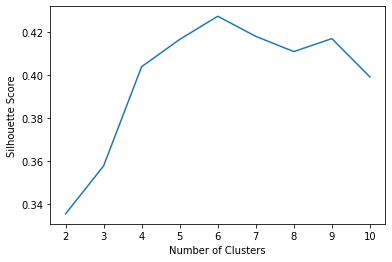

In [39]:
# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [40]:

# Based on the above 2 methods, we can see that optimal number of clusters is 6

# K-means clustering
kmeans = KMeans(n_clusters=6, init='k-means++')

# Fit the k means algorithm on scaled data
kmeans.fit(X_scaled)

KMeans(n_clusters=6)

In [41]:
# Assign the labels to each row
data['clusters'] = kmeans.labels_

# Analyze segments
print(data.groupby('clusters').mean())



                age     income   spending
clusters                                 
0         25.000000  25.260870  77.608696
1         27.000000  56.657895  49.131579
2         56.333333  54.266667  49.066667
3         32.692308  86.538462  82.128205
4         41.264706  88.500000  16.764706
5         45.523810  26.285714  19.380952


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0
clusters,200.0,2.43,1.515448,0.0,1.00,2.0,4.0,5.0


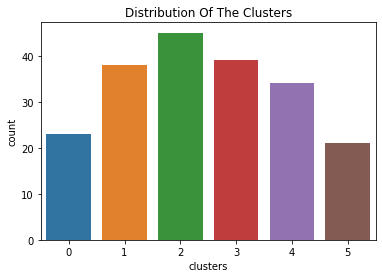

In [43]:
pl = sns.countplot(x=data["clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

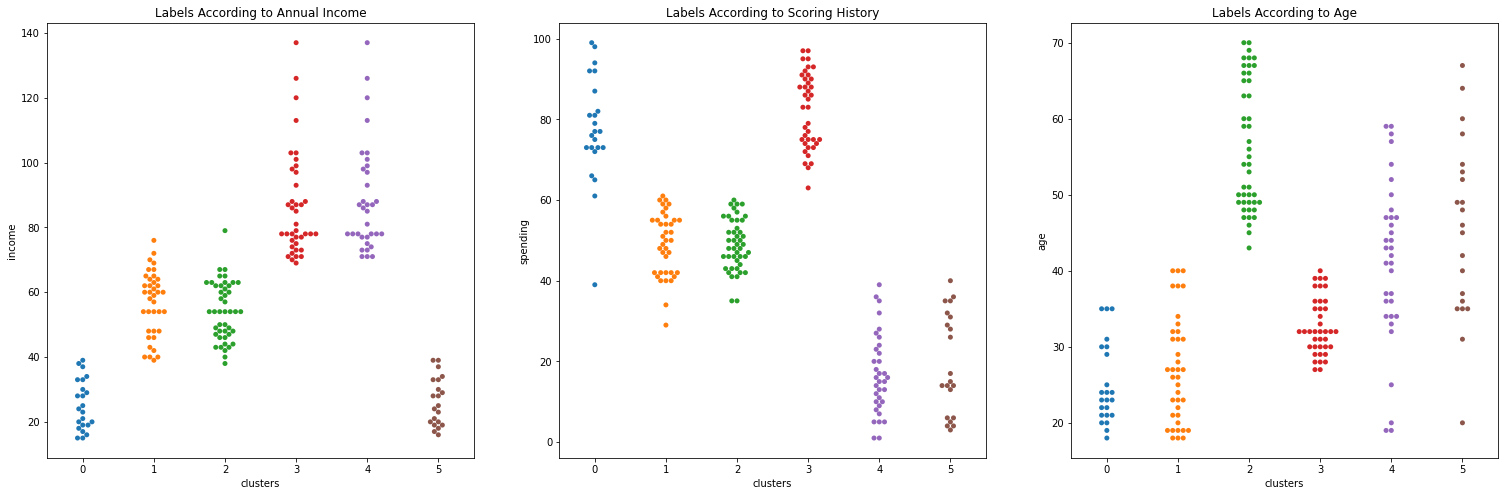

In [44]:
fig = plt.figure(figsize=(26,8))
ax = fig.add_subplot(131)
sns.swarmplot(x='clusters', y='income', data=data, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(132)
sns.swarmplot(x='clusters', y='spending', data=data, ax=ax)
ax.set_title('Labels According to Scoring History')

ax = fig.add_subplot(133)
sns.swarmplot(x='clusters', y='age', data=data, ax=ax)
ax.set_title('Labels According to Age')


plt.show()